<a id = "cell_Summary"></a>
## 1. Executive Summary

- **Business problem**:

For a waste management and processing company, classifying different types of waste has an important role as different waste requires different handling processes. However, doing this process using manual methods is a time- and labor-intensive endeavour. Using Artificial Intelligence (AI) technology, we aim to help the business automate this process and achieve better margin.

- **Data set**:

A data containing 2,864 real images of 6 different types of wastes (i.e., wastes, namely cardboard, glass, metal, paper, plastic and vegetation) was given for the purpose of developing the AI.

- **Method**:

The properly process the data, we performed various techniques and methods to prepare them for AI training. The AI used are all Artificial Neural Network-based. The first model is a simple ANN model, the second one added convolutional technique on top of the first model, and the third model is essentially the same as the second one but have varied parameters.

- **Experiments**:

The experiment goes through the same process for all models. All three models used the same training and testing data, and are evaluated using the same metrics (e.g., recall, precision, f-1 score). Further exploration was also done to explain the level of performance of each model using different methods(e.g.,confusion matrix, eye-balling images, data visualizations).

- **Obtained results**:

Out of the three tried models, the models that use Convolutional technique perform much better. The best Convolutional Artificial Neural Network model (CNN) returned an overall accuracy of 69% on unseen data (the test set). Its best performing class is 'Vegetaion' (88% accuracy) and worst performing class is 'Plastic'(54% accuracy).

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing


### Data loading and exploration

In [ ]:
#Loading basic libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow import keras
import tensorflow as tf
import math
import pandas as pd

tf.config.list_physical_devices('GPU')
np.random.seed(2024)

In [ ]:
#Mounting data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Setting path and loading data
import os

# Set the paths to the folders containing the image files
cardboard_path = '/content/drive/MyDrive/3. Education things/2. Deakin (Master of Biz Analytics)/Year 2 - Trimester 2/MIS780: Advanced Artificial Intelligence for Business/Assignment 2/Assignment2_Dataset/Part2_WasteImages/Cardboard'
glass_path = '/content/drive/MyDrive/3. Education things/2. Deakin (Master of Biz Analytics)/Year 2 - Trimester 2/MIS780: Advanced Artificial Intelligence for Business/Assignment 2/Assignment2_Dataset/Part2_WasteImages/Glass'
metal_path = '/content/drive/MyDrive/3. Education things/2. Deakin (Master of Biz Analytics)/Year 2 - Trimester 2/MIS780: Advanced Artificial Intelligence for Business/Assignment 2/Assignment2_Dataset/Part2_WasteImages/Metal'
paper_path = '/content/drive/MyDrive/3. Education things/2. Deakin (Master of Biz Analytics)/Year 2 - Trimester 2/MIS780: Advanced Artificial Intelligence for Business/Assignment 2/Assignment2_Dataset/Part2_WasteImages/Paper'
plastic_path = '/content/drive/MyDrive/3. Education things/2. Deakin (Master of Biz Analytics)/Year 2 - Trimester 2/MIS780: Advanced Artificial Intelligence for Business/Assignment 2/Assignment2_Dataset/Part2_WasteImages/Plastic'
vegetation_path = '/content/drive/MyDrive/3. Education things/2. Deakin (Master of Biz Analytics)/Year 2 - Trimester 2/MIS780: Advanced Artificial Intelligence for Business/Assignment 2/Assignment2_Dataset/Part2_WasteImages/Vegetation'

# get a list of all files in the folder
cardboard_file_list = os.listdir(cardboard_path)
glass_file_list = os.listdir(glass_path)
metal_file_list = os.listdir(metal_path)
paper_file_list = os.listdir(paper_path)
plastic_file_list = os.listdir(plastic_path)
vegetation_file_list = os.listdir(vegetation_path)

# print the total number of files
print(f'Total number of files under Cardboard folder are: {len(cardboard_file_list)}')
print(f'Total number of files under Glass folder are: {len(glass_file_list)}')
print(f'Total number of files under Metal folder are: {len(metal_file_list)}')
print(f'Total number of files under Paper folder are: {len(paper_file_list)}')
print(f'Total number of files under Plastic folder are: {len(plastic_file_list)}')
print(f'Total number of files under Vegetation folder are: {len(vegetation_file_list)}')

Total number of files under Cardboard folder are: 471
Total number of files under Glass folder are: 420
Total number of files under Metal folder are: 547
Total number of files under Paper folder are: 500
Total number of files under Plastic folder are: 500
Total number of files under Vegetation folder are: 436


In [ ]:
#Preprocess image data

import os
import tensorflow as tf

## Create a list to store the image data and labels
data = []

## Iterate through the files in the first folder
for file in os.listdir(cardboard_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(cardboard_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Cardboard'
    # Add the image data and label to the data list
    data.append((img, label))

## Iterate through the files in the second folder
for file in os.listdir(glass_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(glass_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Glass'
    # Add the image data and label to the data list
    data.append((img, label))

## Iterate through the files in the third folder
for file in os.listdir(metal_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(metal_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Metal'
    # Add the image data and label to the data list
    data.append((img, label))

## Iterate through the files in the fouth folder
for file in os.listdir(paper_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(paper_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Paper'
    # Add the image data and label to the data list
    data.append((img, label))

## Iterate through the files in the fifth folder
for file in os.listdir(plastic_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(plastic_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Plastic'
    # Add the image data and label to the data list
    data.append((img, label))

## Iterate through the files in the sixth folder
for file in os.listdir(vegetation_path):
  # Check if the file is a jpeg or jpg file
  if file.endswith('.jpeg') or file.endswith('.jpg'):
    # Load the image data from the file using TensorFlow
    img = tf.io.read_file(os.path.join(vegetation_path, file))
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, (50, 50))
    # Assign a label to the file
    label = 'Vegetation'
    # Add the image data and label to the data list
    data.append((img, label))

In [ ]:
# Shuffle the data and split into train/test sets

random.shuffle(data)
train_data, test_data = data[:int(len(data) * 0.7)], data[int(len(data) * 0.7):]

In [ ]:
# Converting images into arrays

## Extract the image data and labels from the training data
x_train, y_train = zip(*train_data)

## Extract the image data and labels from the testing data
x_test, y_test = zip(*test_data)

## Convert the image data and labels into NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
# Normalizing data

# change integers to 32-bit floating point numbers
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
x_train /= 255
x_test /= 255

# print the shape of the reshaped data
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (2011, 50, 50, 3)
Testing matrix shape (863, 50, 50, 3)


In [ ]:
print('The original format of class of the first element in the training dataset is: ',y_train[0], '\n')

import numpy as np
# Create a NumPy array with category strings
categories = np.array(['Cardboard', 'Glass','Metal','Paper','Plastic','Vegetation'])

# Create a mapping from category strings to integers
category_map = {'Cardboard': 0, 'Glass': 1, 'Metal': 2, 'Paper': 3, 'Plastic': 4, 'Vegetation': 5}

# Encode the categories
y_train = np.array([category_map[category] for category in y_train])
y_test = np.array([category_map[category] for category in y_test])

print('The unique integer mapping encoding format of the calss of the first element in the training dataset is: ',y_train[0])

The original format of class of the first element in the training dataset is:  Vegetation 

The unique integer mapping encoding format of the calss of the first element in the training dataset is:  5


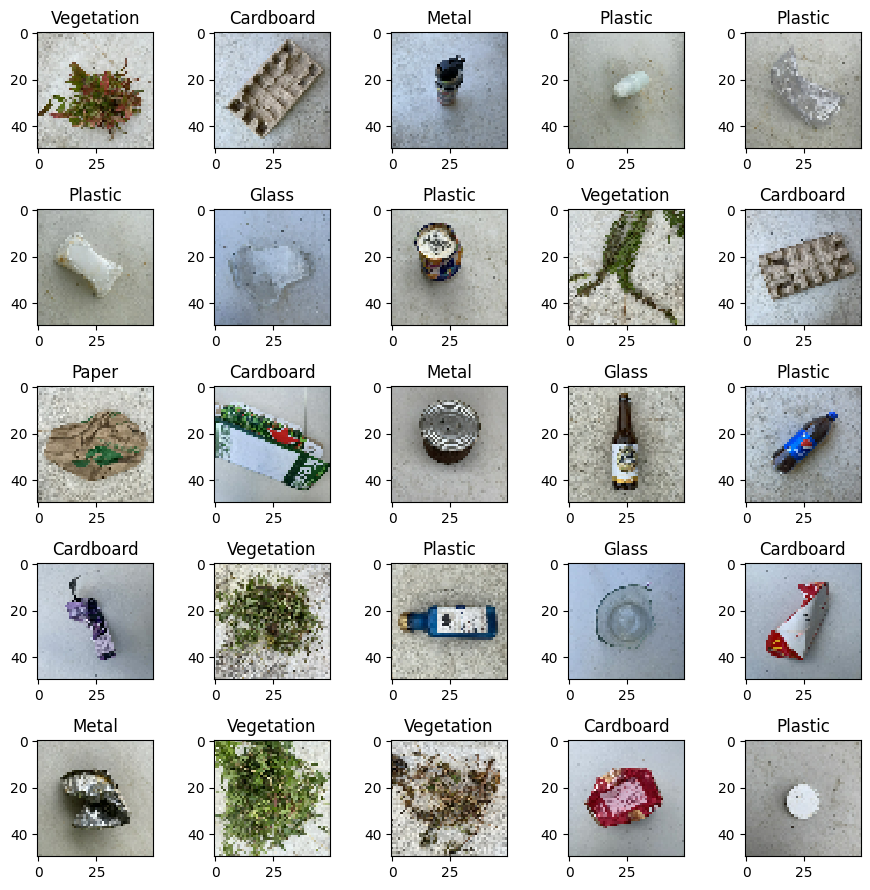

In [ ]:
# change the default figure size for all plots created in the program
plt.rcParams['figure.figsize'] = (9,9)

labels =  ['Cardboard', 'Glass','Metal','Paper','Plastic','Vegetation']

for i in range(25):
    # plt.subplot() function takes three integer arguments: the number of rows, the number of columns, and the index of the subplot.
    plt.subplot(5,5,i+1)
    # plt.imshow() function displays the image at index i in the X_train array as a grayscale image, with no interpolation applied.
    plt.imshow(x_train[i], interpolation='none')
    plt.title("{}".format(labels[int(y_train[i])]))

plt.tight_layout()

<a id = "cell_Summary"></a>
### 2. Platform Preparation

In [ ]:
# Markdown preprocessing
%%html
<style>table {float:left}</style>
<style>img {float:left}</style>

In [ ]:
#Image plotting function
def plot_images(ims, figsize=(12,12), cols=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != 3):
            ims = ims = ims[:,:,:,0]
    f = plt.figure(figsize=figsize)
    rows=len(ims)//cols if len(ims) % cols == 0 else len(ims)//cols + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
#Platform prepping
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

### 3. Data Preparation/exploration

In [ ]:
# Data parameters
img_rows, img_cols = 50, 50
channels = 3

num_classes = 6
class_names = ['Cardboard', 'Glass','Metal','Paper','Plastic','Vegetation']

In [ ]:
from tensorflow.keras.utils import to_categorical

# Reshape images for processing
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)


# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('Train shape: x=', x_train.shape, ', y=', y_train.shape)
print('Test shape: x=', x_test.shape, ', y=', y_test.shape)

Train shape: x= (2011, 50, 50, 3) , y= (2011, 6)
Test shape: x= (863, 50, 50, 3) , y= (863, 6)


might need to delete above bc it seems overlap with some code above (we copied the entire thing from 2 different sources)

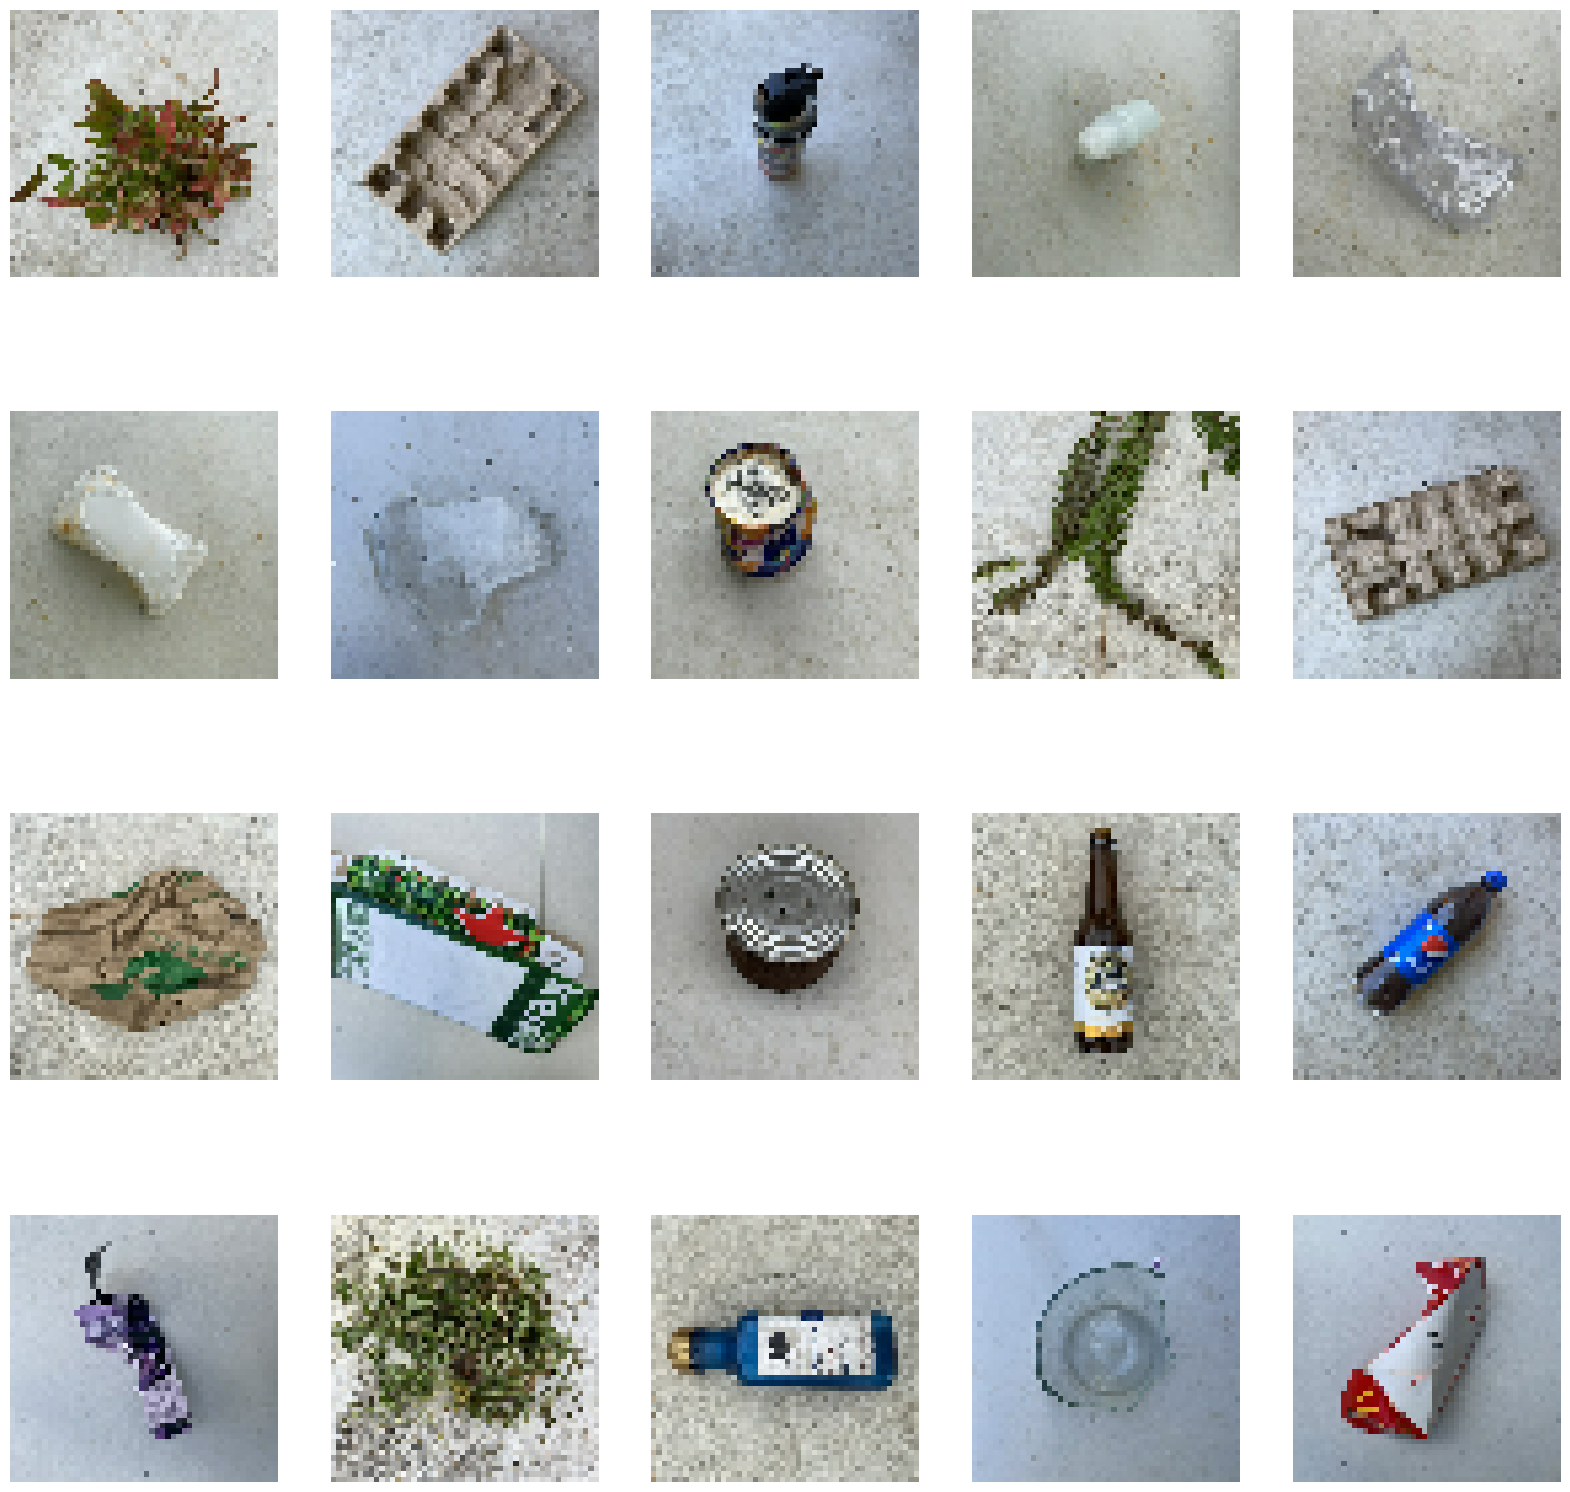

In [ ]:
#Checking some examples of the data
plot_images(x_train[0:20], cols=5,figsize=[20,20])

<a id = "cell_model"></a>
## 3. Predictive Modeling

*Create and explain your models (e.g., model architecture, model parameters). Evaluate the models on the experimental data sets.*

In [ ]:
#Importing relevant libraries for CNN model construction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from tensorflow.keras.layers import MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, Callback, EarlyStopping
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Nadam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

We now define the models that we will run next. This is to experiment with different techinque and methods to yield the best outcomes. The 'Model execution' section will retain and show the details of the last run model while the "Experiment report" section will result of all attempts/models, compare them, and discuss findings.

### First model - Traditional, single flatten layer Artificial Neural Network (ANN)

Model explanation:
- Model architecture: The first model developed has a traditional ANN architecture. In this instance, the model contains only one flatten layer, one hidden layer, one additional layer, and the output layer. All layers are fully connected.

- Model parameters:
  + In the first layer, The models takes in the parameters about the images' resolution (i.e., **50x50**), and uses **3 color channels** to interpret 2-D images as 1-D vectors (flattened).
  + The second layer is composed of **128 neurons** and uses `Rectified Linear Unit` activation function.
  + The third layer uses `'Dropout'` method that randomly sets **20%** of input values into 0 to avoid overfitting.
  + The final layer uses the **same number of neurons as the number of classes** of waste (i.e.,6), and uses `softmax` as the activation function which shows a probability distribution over possible classifications.

In [ ]:
#Traditional ANN definition
def model_1():
    model = Sequential()
    model.add(Flatten(input_shape=(img_rows, img_cols, channels)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

### Second model - Convolutional layers CNN

Model explanation:
- Model architecture: In addition to all the layers of the first model, this model uses additional ones with convolution technique to increase the accuracy of predictions. In more detail, the first layer will take in the images' data as input and uses convolutional analysis to intepret the data. The second layer uses `MaxPooling` method to reduce the spatial dimensions and downsample the input. Another layer of `Dropout` is added to avoid overfitting and then the layers of the first model are added.

- Model parameters:
  + In the first layer, The model uses 2-dimensional convolutional technique to interpret the images' data with a kernel size of **3x3**. It still uses `Rectified Linear Unit` as activation function and the same input shape like the first model. This layer also takes a parameters of **50 filters**, having the kernel "slides" across the images in 50 different areas with size 3x3.
  + The second layer, `MaxPooling`, uses a pool size of **2x2**. Tihs means it will condense the feature maps (i.e., the images being divided into pixels) into smaller ones by taking out the maximum value of every block of pixel with size 2x2.
  + The third layer uses `Dropout` method that randomly sets **25%** of input values into 0 to avoid overfitting.
  + The remaining layers are essentially the same as the first model with the only difference being the rate of `Dropout` being **50%** instead.

In [ ]:
#CNN model with two Convolution layers, one Pooling layer with max pooling,
#which are stacked on top of a traditional ANN model (with the same architecture as the model 1)
def model_2():
    model = Sequential()
    model.add(Conv2D(50, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

In [ ]:
# Keras callbacks (when Tensorboard installed)
keras_callbacks = [EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

### Third model - Convolutional layers CNN with different parameters

Model explanation:
- Model architecture: This model's architecture is the same as the second model. We only try to yield better results by changing the paramters here.

- Model parameters:
  + The first difference is in the first layer, having the number of filters being 32 instead of 50.
  + The second difference is in the second `Dropout` layer having a transformation ratio of 0.4 instead of 0.5.

In [ ]:
#CNN model with different parameters' value, same architecture as model 1 and 2
def model_3():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(img_rows, img_cols, channels)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    return model

### Model execution

In [ ]:
#Choice of model
model = model_3()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,361,094 (9.01 MB)

 Trainable params: 2,361,094 (9.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the model using RMSprop optimize

model.compile(loss=categorical_crossentropy,
              optimizer=RMSprop(learning_rate=0.001,weight_decay=1e-6),
              metrics=['accuracy'])

#Other Optimizers that can be used instead of RMSprop
#Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)
#Adadelta(lr=0.05, rho=0.99, epsilon=1e-07)
#Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

hist = model.fit(x_train, y_train,
      batch_size=128,
      epochs=100,
      verbose=2,
      validation_data=(x_test, y_test),
      validation_split=0.3,
      callbacks=keras_callbacks)

Epoch 1/100
16/16 - 6s - 358ms/step - accuracy: 0.1850 - loss: 3.1057 - val_accuracy: 0.3279 - val_loss: 1.7324
Epoch 2/100
16/16 - 6s - 403ms/step - accuracy: 0.2536 - loss: 1.7340 - val_accuracy: 0.2538 - val_loss: 1.7065
Epoch 3/100
16/16 - 5s - 343ms/step - accuracy: 0.2611 - loss: 1.7049 - val_accuracy: 0.3708 - val_loss: 1.6094
Epoch 4/100
16/16 - 9s - 553ms/step - accuracy: 0.2969 - loss: 1.6602 - val_accuracy: 0.3975 - val_loss: 1.5655
Epoch 5/100
16/16 - 7s - 414ms/step - accuracy: 0.3421 - loss: 1.5459 - val_accuracy: 0.3720 - val_loss: 1.5517
Epoch 6/100
16/16 - 4s - 260ms/step - accuracy: 0.3695 - loss: 1.5197 - val_accuracy: 0.4438 - val_loss: 1.4307
Epoch 7/100
16/16 - 5s - 313ms/step - accuracy: 0.3774 - loss: 1.4935 - val_accuracy: 0.4623 - val_loss: 1.3339
Epoch 8/100
16/16 - 6s - 379ms/step - accuracy: 0.4207 - loss: 1.3992 - val_accuracy: 0.3523 - val_loss: 1.4518
Epoch 9/100
16/16 - 4s - 243ms/step - accuracy: 0.4217 - loss: 1.3940 - val_accuracy: 0.5747 - val_loss:

In [ ]:
# Evaluate on training data
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.3279
Train accuracy: 0.9294 

Test loss: 1.0553
Test accuracy: 0.6304


Using accuracy alone, it can be seen that the model achieved exceptional performance on the training dataset with 98.81% accuracy. However, when applied on new data, the model performed, though still well, worse and reached only 68.95% accuracy.

Neverthelesss, out of all the models tried, this model still performed the best.

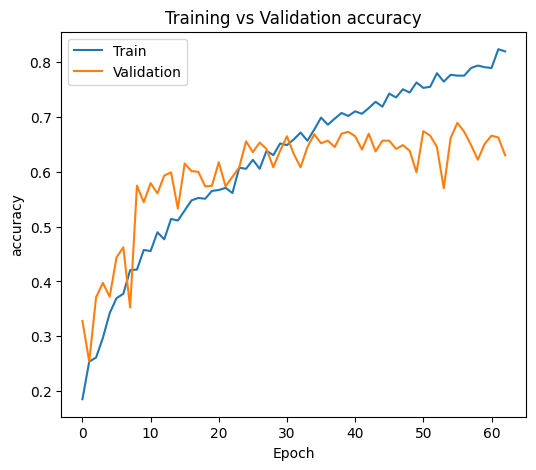

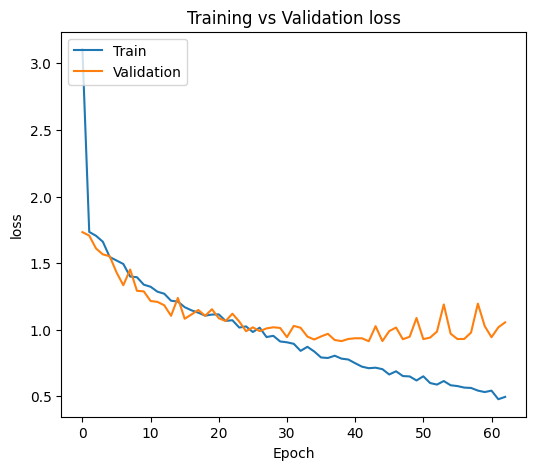

In [ ]:
#Plotting learning history
import pandas as pd
plot_hist(pd.DataFrame(hist.history))

A closer look into training progress by epoch shows a diverging trend. While performance is relatively equal for both training and validation data during the first 20 epochs, it quickly and increasingly diverge with each epoch. This could imply the problem of overfitting to training data, making the model work well on training data but worse on new data. This is one of the possible rooms for improvement.

In [ ]:
#Calculating accuracy

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert the predicted labels to continuous-multioutput format
y_pred_continuous = np.round(y_pred)

# Convert the predicted labels to multiclass format
y_pred_multiclass = np.argmax(y_pred, axis=1)
y_test_multiclass = np.argmax(y_test, axis=1)

# Calculate the kappa score
kappa = cohen_kappa_score(y_test_multiclass, y_pred_multiclass)
print("The result of Kappa is :", round(kappa, 3))

# Generate the classification report
report = classification_report(y_test_multiclass, y_pred_multiclass, target_names= class_names)

# Print the report
print("The result of the classification report is: \n ",report)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
The result of Kappa is : 0.556
The result of the classification report is: 
                precision    recall  f1-score   support

   Cardboard       0.62      0.64      0.63       142
       Glass       0.90      0.53      0.67       138
       Metal       0.59      0.57      0.58       173
       Paper       0.54      0.83      0.66       146
     Plastic       0.47      0.31      0.38       143
  Vegetation       0.76      0.96      0.85       121

    accuracy                           0.63       863
   macro avg       0.65      0.64      0.63       863
weighted avg       0.64      0.63      0.62       863



Putting numbers on a accuracy table shows the model's specialization in identifying 'Vegetation' waste. On a sample of 127 images of this type of waste, the model correctly identified 91% of them and 85% of the time it predicts 'Vegetation' turned out to be correct. Other classes see lower performance in this order: 'Glass', 'Cardboard'/'Paper (tied),'Metal', and 'Plastic'.

'Plastic' is currently the worst performing class for the model with a recall level of just 0.5 and precision level of 0.59. This means that the model incorrecly labelled 50% of images that show plastic waste and out of all the times that it labels an image as 'Plastic', it is only correct 59% of the time.

In [ ]:
#Checking data of predicted labels
y_pred

array([[2.7684661e-02, 9.6714795e-03, 4.2266052e-02, 1.1952264e-01,
        4.7221683e-02, 7.5363344e-01],
       [2.4165274e-01, 1.9537851e-02, 8.5125454e-02, 1.7753220e-01,
        4.6601385e-01, 1.0137883e-02],
       [2.5995873e-02, 7.8783460e-06, 5.3823638e-01, 3.9763835e-01,
        3.8104855e-02, 1.6616224e-05],
       ...,
       [4.8705229e-01, 5.8812727e-03, 8.0244886e-03, 3.6525315e-01,
        1.3247824e-01, 1.3105766e-03],
       [3.2262318e-04, 1.4791628e-06, 9.6960741e-01, 1.4042167e-02,
        1.6024487e-02, 1.7169226e-06],
       [5.1399994e-01, 1.0464648e-03, 1.6858990e-01, 2.0645580e-01,
        1.0766626e-01, 2.2416704e-03]], dtype=float32)

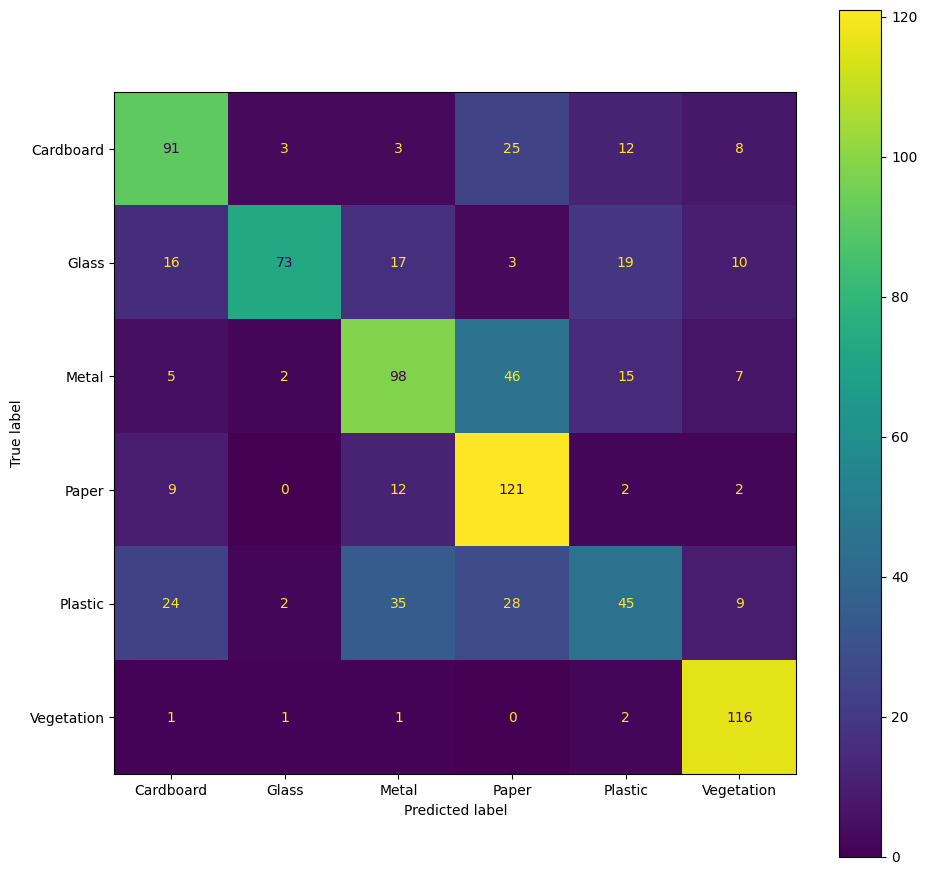

In [ ]:
#Generating confusion matrix

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(
    y_test_multiclass,
    y_pred_multiclass)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=class_names)

# Create a figure with a larger size
fig = plt.figure(figsize=(11, 11))

# Create a subplot within the figure
ax = fig.subplots()

# Plot the confusion matrix as a heatmap
display.plot(ax=ax)

# Show the plot
plt.show()

Further exploration using confusion matrix how where the model easily gets confused. For its worst class, 'Plastic', the model usually mistakes actual plastic with 'Metal', and 'Cardboard' waste. One possible explanation is that the plastic-based product sometimes try to mimic the outlook of other materials to make itself look more attractive to buyers (since plastic is one of the cheapest materials).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


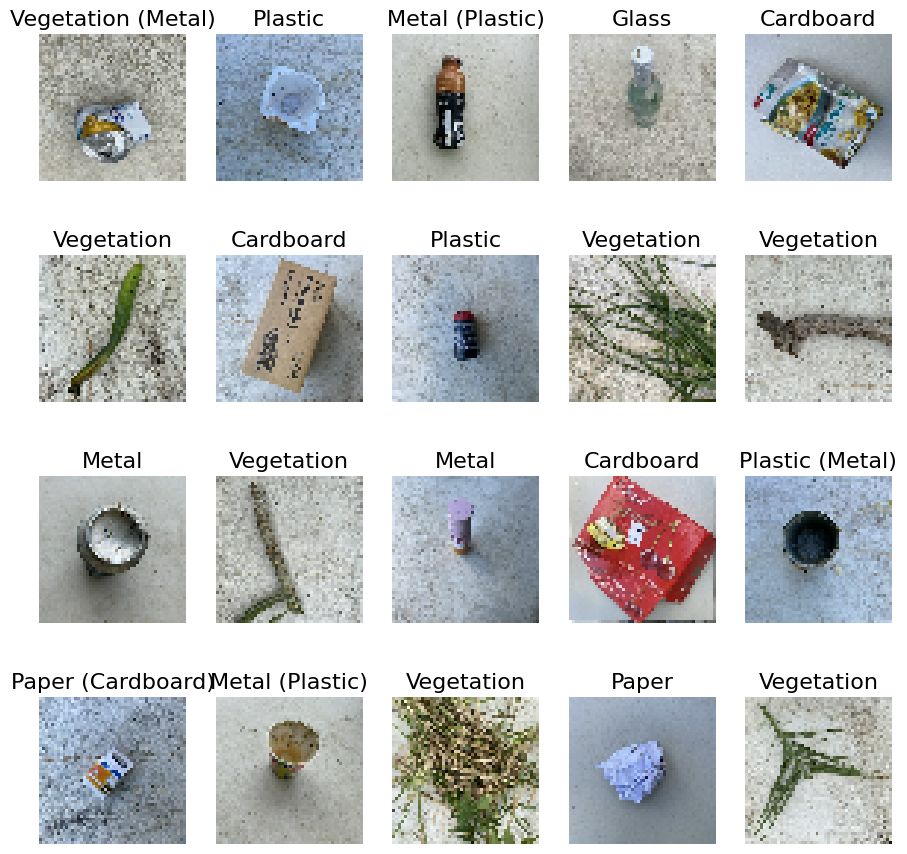

In [ ]:
#Printing sample predictions
img_range = range(20)
imgs = x_test[img_range]
true_labels = [class_names[np.argmax(x)] for x in y_test[img_range]]
predictions = model.predict(imgs.reshape(len(img_range), img_rows, img_cols, channels))
pred_labels = [class_names[np.argmax(x)] for x in predictions]
titles = [pred_labels[x]+('' if true_labels[x] == pred_labels[x] else ' ('+true_labels[x]+')') for x in img_range]
plot_images(imgs, cols=5, figsize=(11,11), titles=titles)

Taking a look at some sample images shows that the model is doing a good job at identification via still iamges. In cases where it is wrong, it is difficult for even human to distinguish using just these images. The distinctions in these cases are usually subtle. Like in the most-bottom, most-left image, the glass bottle has brown content making it look brown which is a colour usually worn by cardboards.

<a id = "cell_report"></a>
## 4. Experiments Report

### Result discussion

In [ ]:
# Importing relevant libraries for image display
from google.colab import files
from IPython.display import Image

In [ ]:
#Choosing images to display

uploaded = files.upload()

In [ ]:
#Import relevant library to read the images
import matplotlib.image as mpimg

# Identify path to relevant images
paths = ('/content/model 1 - accuracy graph.png','/content/model 1 - accuracy graph.png','/content/model 1 - accuracy graph.png','/content/model 1 - loss graph.png')

# Lay out conditions of display
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Perform a loop to display all relevant images
i = -1
for x in paths:
  img = mpimg.imread(x)
  i = i + 1
  ax[i].imshow(img)
  ax[i].axis('off')  # Hide the axes for better visuals

Besides the model above, we also tried a simple ANN model with just a single flatten layer. Such simple model usually takes much shorter time to give out results and uses less processing power, allowing for a more diverse space of application. However, this model performed poorly on the test set. In terms of accuracy, it quickly levelled after around the fifth epochs, reaching an accuracy of less than 19%. The loss function graph shows unnoticeable change with training.

In [ ]:
#Display image 2
Image('model 1 - accuracy report.png',
      width = 700)

The accuracy report implies the reason behind is that the model sees all images as 'Metal' waste since this is the only class with any accuracy level. The Kappa score of 0 also indicates that the model's predictions are not reliable at all.

This model, therefore, failed the task of classification completely and is unsuitable for usage.

In [ ]:
# Identify path to relevant images
paths = ('/content/model 3 - accuracy graph.png','/content/model 3 - loss graph.png')

# Lay out conditions of display
fig, ax = plt.subplots(1, 2, figsize=(20, 20))

# Perform a loop to display all relevant images
i = -1
for x in paths:
  img = mpimg.imread(x)
  i = i + 1
  ax[i].imshow(img)
  ax[i].axis('off')  # Hide the axes for better visuals

After the success of the model described in 'Model execution' section, we looked into improving it by changing certain parameters:
  + The first change is in the first layer, having the number of filters being 32 instead of 50.
  + The second difference is in the second `Dropout` layer having a transformation ratio of 0.4 instead of 0.5.

While the silver lining is that there is more agreement between performance on train and validation data (meaning there is less chance of overfitting), the overall performance of this model compared to the previous is worse off. Even at its peak, it could not break 0.6 mark while the other one well pass this level.


In [ ]:
#Display image
Image('model 3 - accuracy report.png',
      width = 700)

There are clear fall in accuracy for 'Vegetation', and 'Cardboard'. For these two, the trend is small increase in precision but significant decrease in recall. More slight decreases could be seen for other classes, leading to an overall decrease in performance for this model compared to the previous.

### Model application to solve business problem

**Application:**

There are a lot of application from having the ability to systematically and automatically identify type of waste for a waste management company. One of the possibilities is to automate the identification process at the company. This can be done by developing a sensor with the model and an accommodating hardware arrangement. Similar concept has been explore in Joshua et al., (2020). In their paper, the authors specified not only the models used but also the design of an automated segragation system.

For our model in particular, while it is not good at identifying every type of waste, it is excellent at identifying 'Vegetation' waste. It can fasten waste seggregation process by seggregating between vegetation and non-vegetation waste. This could be useful as vegetation waste usually go through a different journey of disposal or recycle. The streamlined process could be a huge cost save for the company in the long run depending on how it follow ups on this new AI-based capability.


**How to improve the model:**

The model can also be further improved in various ways. First, without taking additional cost and time to collect more data, different parameters of the same architecture or different model architectures could be utilized. To save labour cost and time, research papers can be consulted to pick out best techniques and models to try. Narayanswamy et al., (2022) summarized the findings after trying a few other AI for waste segregation and can be great starting point for further experiment and development in AI for the company.


The second way is to collect more data. There are many companies that specialize in collecting data for AI training (e.g., Appen, Prolific) and can be potential partners for the company. Alternatively, the company can collect waste images themselves and develop its own in-house data annotation team to prepare the data for improving AI models.

Finally, the approach to data or purpose to the model can be changed to achieve higher results. For example, the data can be formatted to include only 2 classes like 'Metal' and 'Non-metal'. This would be used to create a model that will likely to be much better at detecting metal waste. Layering models, one for each type of waste, could potentially produce a better overall model.

As the model get better, the space of possible application and application potency increases. The model can distinguish more type of wate or make less error in identifying waste types in its current scope.

<a id = "cell_report"></a>
## 5. Reference

Joshua, M., Anthony, A., Ama, D., & Arvin, J. (2020, May 18). Automated Waste Segregation System using Trained Optical and Material Sensors with User Communication... ResearchGate; unknown. https://www.researchgate.net/publication/342747452_Automated_Waste_Segregation_System_using_Trained_Optical_and_Material_Sensors_with_User_Communication_Capabilities




Narayanswamy, N., Rajak, A. R. A., & Hasan, S. (2022). Development of Computer Vision Algorithms for Multi-class Waste Segregation and Their Analysis. Emerging Science Journal, 6(3), 631–646. https://doi.org/10.28991/esj-2022-06-03-015